One time shift due to a double value
10 other shifts in the data for various amounts of time
most often in the months of 02 and 03

In [1]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates

In [2]:
#bhp_light9300 = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Bob Hall Pier/BobHallPier_1993-2000_pwl_harmwl_bwl.csv')
bhp_light9300 = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Bob Hall Pier\BobHallPier_1993-2000_pwl_harmwl_bwl.csv')
bhp_light9300.drop(labels=range(701280,701286),axis = 0, inplace = True)

#bhp_light0112 = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Bob Hall Pier/BobHallPier_2001-2012_pwl_harmwl_bwl.csv')
bhp_light0112 = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Bob Hall Pier\BobHallPier_2001-2012_pwl_harmwl_bwl.csv')
bhp_light0112.drop(labels=range(1051920,1051926), axis = 0, inplace=True)


#bhp_light1323 = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Bob Hall Pier/BobHallPier_2013-2023_pwl_harmwl_bwl.csv')
bhp_light1323 = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Bob Hall Pier\BobHallPier_2013-2023_pwl_harmwl_bwl.csv')
bhp_light1323.drop(labels=range(len(bhp_light1323)-6,len(bhp_light1323)), axis=0, inplace=True)


bhp_noaa_2012 = pd.read_csv(r'C:\\Users\\mrpro\\OneDrive\\Desktop\\bobHallPier_2012_station2.csv')
bhp_noaa_2012['Date_Time'] = pd.to_datetime(bhp_noaa_2012['Date_Time']) # Converting to datetime

bhp_noaa_2012[' Water_Level'] = pd.to_numeric(bhp_noaa_2012[' Water_Level'], errors='coerce')

C:\Users\mrpro\AppData\Local\Temp\ipykernel_2180\2997807456.py:6: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  bhp_light0112 = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Bob Hall Pier\BobHallPier_2001-2012_pwl_harmwl_bwl.csv')
C:\Users\mrpro\AppData\Local\Temp\ipykernel_2180\2997807456.py:11: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  bhp_light1323 = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Bob Hall Pier\BobHallPier_2013-2023_pwl_harmwl_bwl.csv')


In [3]:
frames = [bhp_light9300,bhp_light0112,bhp_light1323]
bhp_light = pd.concat(frames, ignore_index=True)
len(bhp_light)

2717280

In [4]:
#directory_path = '/Users/rprocious/Downloads/data/NOAA/bobHallPier/'
directory_path = r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\NOAA\bobHallPier'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

bhp_NOAA = pd.concat(dataframes, ignore_index=True)

In [5]:
bhp_NOAA.tail()

,Date Time,Water Level,Sigma,O or I (for verified),F,R,L,Quality
2304166,2022-04-14 16:18,6.978,0.209,0.0,0.0,0.0,0.0,p
2304167,2022-04-14 16:24,6.953,0.162,1.0,0.0,0.0,0.0,p
2304168,2022-04-14 16:30,6.902,0.173,1.0,0.0,0.0,0.0,p
2304169,Error: No data was found. This product may not...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2304170,Error: No data was found. This product may not...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bhp_NOAA.drop(labels=range(0,3), axis=0, inplace=True)
bhp_NOAA.drop(labels=range(2304169,2304171), axis=0, inplace=True)
bhp_NOAA[2304160:2304170]

,Date Time,Water Level,Sigma,O or I (for verified),F,R,L,Quality
2304163,2022-04-14 16:00,6.874,0.147,1.0,0.0,0.0,0.0,p
2304164,2022-04-14 16:06,6.903,0.188,1.0,0.0,0.0,0.0,p
2304165,2022-04-14 16:12,6.912,0.181,0.0,0.0,0.0,0.0,p
2304166,2022-04-14 16:18,6.978,0.209,0.0,0.0,0.0,0.0,p
2304167,2022-04-14 16:24,6.953,0.162,1.0,0.0,0.0,0.0,p
2304168,2022-04-14 16:30,6.902,0.173,1.0,0.0,0.0,0.0,p


In [7]:
bhp_NOAA.head()

,Date Time,Water Level,Sigma,O or I (for verified),F,R,L,Quality
3,1996-01-01 00:00,6.800,0.160,0.0,0.0,0.0,0.0,v
4,1996-01-01 00:06,6.773,0.164,0.0,0.0,0.0,0.0,v
5,1996-01-01 00:12,6.806,0.161,0.0,0.0,0.0,0.0,v
6,1996-01-01 00:18,6.833,0.160,0.0,0.0,0.0,0.0,v
7,1996-01-01 00:24,6.869,0.155,0.0,0.0,0.0,0.0,v


In [8]:
#converting lighthouse dataset to date time and numeric values
bhp_light.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
bhp_light['#date+time'] = pd.to_datetime(bhp_light['#date+time'])
bhp_light['014-pwl'] = pd.to_numeric(bhp_light['014-pwl'], errors='coerce')



#converting NOAA dataset to date time and numeric values
bhp_NOAA.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
bhp_NOAA['Date Time'] = pd.to_datetime(bhp_NOAA['Date Time'])
bhp_NOAA[' Water Level'] = pd.to_numeric(bhp_NOAA[' Water Level'], errors = 'coerce')

#remove all light house data till 1996 because thats when NOAA data begins
bhp_light.drop(labels=range(0,262800),axis=0, inplace=True)

bhp_light.reset_index(drop = True, inplace=True)
bhp_light.head(20)

,#date+time,014-pwl,014-bwl,014-harmwl
0,1996-01-01 00:00:00,6.800,2.854,6.652
1,1996-01-01 00:06:00,6.773,NaN,6.650
2,1996-01-01 00:12:00,6.806,NaN,6.649
3,1996-01-01 00:18:00,6.833,NaN,6.648
4,1996-01-01 00:24:00,6.869,NaN,6.646
5,1996-01-01 00:30:00,6.818,2.871,6.645
6,1996-01-01 00:36:00,6.823,NaN,6.644
7,1996-01-01 00:42:00,6.834,NaN,6.643
8,1996-01-01 00:48:00,6.840,NaN,6.642
9,1996-01-01 00:54:00,6.855,NaN,6.641


In [9]:
comparison_df = pd.DataFrame()
comparison_df['Dates'] = bhp_light['#date+time']
comparison_df['Lighthouse WL'] = bhp_light['014-pwl']
comparison_df['NOAA WL'] = bhp_NOAA[' Water Level']
comparison_df.head(10)

,Dates,Lighthouse WL,NOAA WL
0,1996-01-01 00:00:00,6.800,NaN
1,1996-01-01 00:06:00,6.773,NaN
2,1996-01-01 00:12:00,6.806,NaN
3,1996-01-01 00:18:00,6.833,6.800
4,1996-01-01 00:24:00,6.869,6.773
5,1996-01-01 00:30:00,6.818,6.806
6,1996-01-01 00:36:00,6.823,6.833
7,1996-01-01 00:42:00,6.834,6.869
8,1996-01-01 00:48:00,6.840,6.818
9,1996-01-01 00:54:00,6.855,6.823


In [10]:
len(comparison_df)

2454480

(5.0, 9.0)

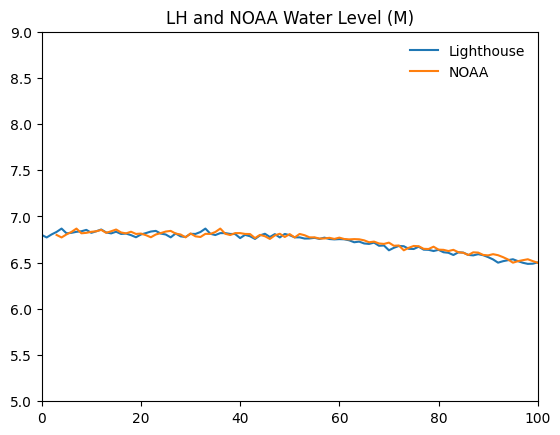

In [11]:
#plots raw data 
plt.plot(comparison_df['Lighthouse WL'], label = 'Lighthouse')

plt.plot(comparison_df['NOAA WL'], label = 'NOAA')
plt.title('LH and NOAA Water Level (M)')
plt.legend(frameon= False)
plt.xlim(0,100)
plt.ylim(5,9)

Looks like data needs to be shifted on the X axis

(5.0, 9.0)

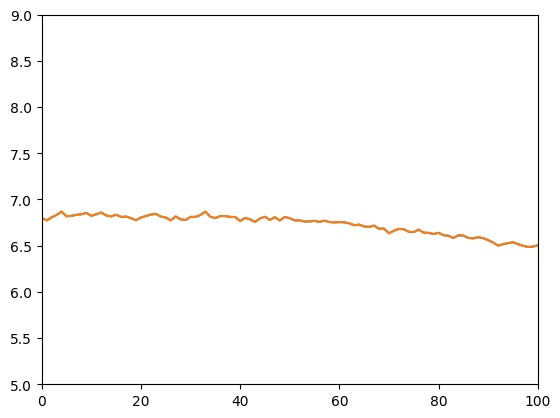

In [12]:
#shifts data over 3 index points

comparison_df['Shifted NOAA'] = comparison_df['NOAA WL'].shift(-3)

#plotting corrected data
plt.plot(comparison_df['Lighthouse WL'])

#plt.plot(comparison_df['NOAA WL'])

plt.plot(comparison_df['Shifted NOAA'])

x_limits = [0,100]
y_limits = [5,9]
plt.xlim(x_limits)
plt.ylim(y_limits)

Python added 3 extraa NaN values?
Shifted it back 3 Index points to match lighthouse

In [13]:
comparison_df.head()

,Dates,Lighthouse WL,NOAA WL,Shifted NOAA
0,1996-01-01 00:00:00,6.800,NaN,6.800
1,1996-01-01 00:06:00,6.773,NaN,6.773
2,1996-01-01 00:12:00,6.806,NaN,6.806
3,1996-01-01 00:18:00,6.833,6.800,6.833
4,1996-01-01 00:24:00,6.869,6.773,6.869


Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Lighthouse and NOAA Offset')

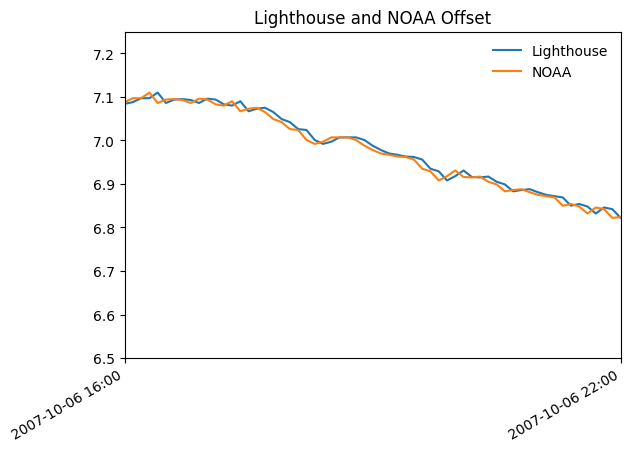

In [17]:
plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.5,7.25)

start_date = pd.to_datetime('2007-10-06 16:00')

end_date = pd.to_datetime('2007-10-06 22:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Lighthouse and NOAA Offset')

In [14]:
#finding differences between the two data sets
differences = []
location = []

for i in range((len(comparison_df))):

    if comparison_df.loc[i,'Lighthouse WL'] - comparison_df.loc[i,'Shifted NOAA'] != 0:

        differences.append((comparison_df.loc[i,'Lighthouse WL'] - comparison_df.loc[i,'Shifted NOAA']))
        location.append(comparison_df.loc[i,'Dates'])



KeyboardInterrupt: 

In [15]:
len(differences)

123377

About half of the values are different

Text(0.5, 1.0, 'Distribution of differences')

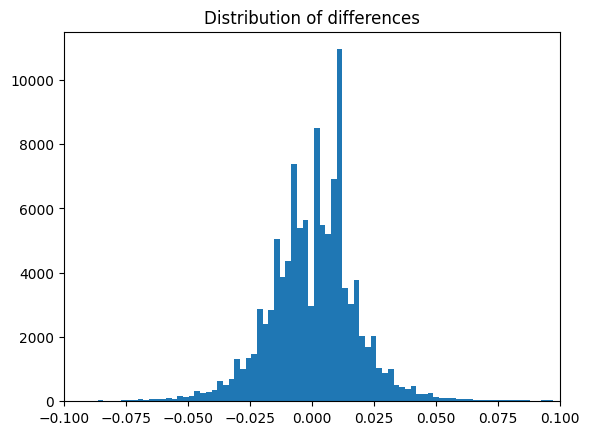

In [18]:
plt.hist(differences, bins = 1000)
plt.xlim(-0.1, 0.1)
plt.title('Distribution of differences')

In [19]:
value_counts = Counter(differences)

repeating_values = {value: count for value, count in value_counts.items() if count > 1}


# Count the number of repeating values
df_repeating_values = pd.DataFrame(list(repeating_values.items()), columns=['Value', 'Count'])
df_repeating_values

,Value,Count
0,-0.095,8
1,-0.107,7
2,-0.078,8
3,0.008,2343
4,0.102,9
...,...,...
499,0.116,2
500,-0.113,2
501,-0.087,2
502,-0.165,2


In [20]:
len(location)

123377

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Lighthouse and NOAA Begining of Offset')

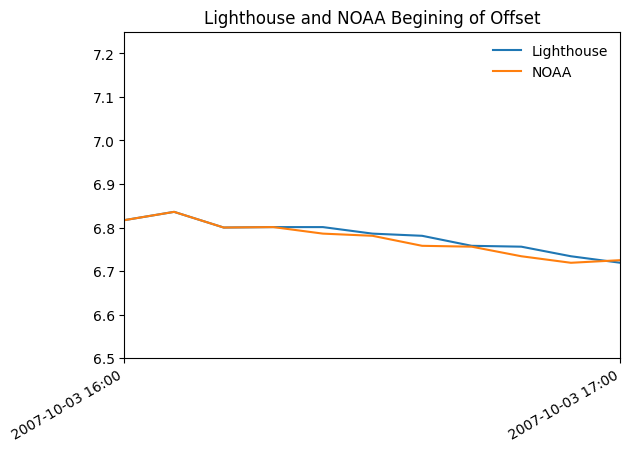

In [20]:
plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.5,7.25)

start_date = pd.to_datetime('2007-10-03 16:00')

end_date = pd.to_datetime('2007-10-03 17:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Lighthouse and NOAA Begining of Offset')

where it looks like the data gets off 
at 16:24 there is a double point of data that is inserted
both values at 16:18 and 16:24 are the same at 6.801

In [21]:
comparison_df[1030480:1030500]

,Dates,Lighthouse WL,NOAA WL,Shifted NOAA
1030480,2007-10-03 16:00:00,6.817,6.825,6.817
1030481,2007-10-03 16:06:00,6.836,6.832,6.836
1030482,2007-10-03 16:12:00,6.800,6.825,6.800
1030483,2007-10-03 16:18:00,6.801,6.817,6.801
1030484,2007-10-03 16:24:00,6.801,6.836,6.786
1030485,2007-10-03 16:30:00,6.786,6.800,6.781
1030486,2007-10-03 16:36:00,6.781,6.801,6.758
1030487,2007-10-03 16:42:00,6.758,6.786,6.756
1030488,2007-10-03 16:48:00,6.756,6.781,6.734
1030489,2007-10-03 16:54:00,6.734,6.758,6.719


In [21]:
#deleting the double point on the lighthouse df
revised_lighthouse = pd.DataFrame()
revised_lighthouse ['revised_LH'] = comparison_df['Lighthouse WL']

revised_lighthouse.drop(1030483,axis=0,inplace=True)
revised_lighthouse.reset_index(drop = True, inplace=True)
revised_lighthouse[1030480:1030500]

,revised_LH
1030480,6.817
1030481,6.836
1030482,6.800
1030483,6.801
1030484,6.786
1030485,6.781
1030486,6.758
1030487,6.756
1030488,6.734
1030489,6.719


In [22]:
#adding it into the comparison df
comparison_df['Shifted LH'] = revised_lighthouse['revised_LH']

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Deleted point correction')

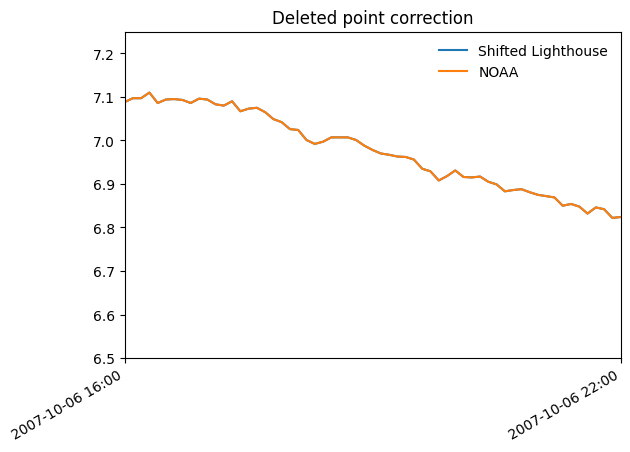

In [25]:
#plotting for validation
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Shifted Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.5,7.25)

start_date = pd.to_datetime('2007-10-06 16:00')

end_date = pd.to_datetime('2007-10-06 22:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Deleted point correction')

In [25]:
# checking for smaller differences now that time ofset if adjusted
differences_revised = []
location_revised = []

for i in range(len(comparison_df)):
    difference = comparison_df.loc[i, 'Shifted LH'] - comparison_df.loc[i, 'Shifted NOAA']
    
    if difference != 0 and not pd.isna(difference):
        differences_revised.append(difference)
        location_revised.append(comparison_df.loc[i, 'Dates'])


In [26]:
len(location_revised)

64809

In [27]:
#creates a df of the different points
summary_df = pd.DataFrame()
summary_df['Location Date'] = location_revised
summary_df['Difference'] = differences_revised


In [28]:
summary_df[42003:50565]

,Location Date,Difference
42003,2015-02-20 17:36:00,-0.002
42004,2015-02-20 17:42:00,-0.002
42005,2015-02-20 17:48:00,-0.002
42006,2015-02-20 17:54:00,-0.002
42007,2015-02-20 18:00:00,-0.002
...,...,...
50560,2015-04-01 17:30:00,-0.002
50561,2015-04-30 18:48:00,-0.012
50562,2015-04-30 18:54:00,-0.035
50563,2015-04-30 19:00:00,-0.011


In [29]:
#function to find the index of a date range
def date_index_locater(start_date,end_date):
    indices = []
# Filter rows by date range
    date_range_filter = (comparison_df['Dates'] >= start_date) & (comparison_df['Dates'] <= end_date)

# Get the indices of the rows within the date range
    indices = (comparison_df[date_range_filter].index.tolist())

    return(indices)



Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Begining of -0.002m Offset')

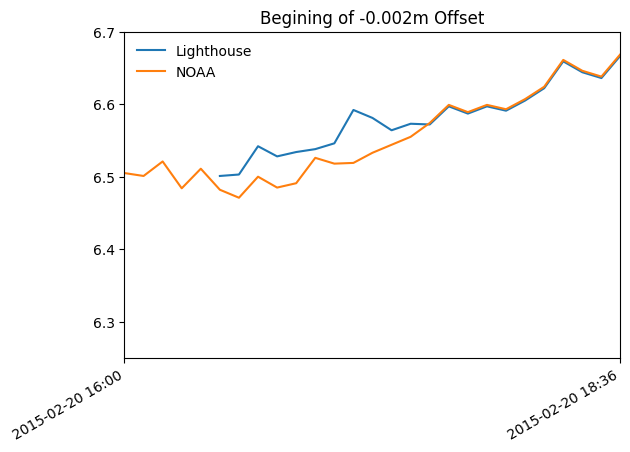

In [30]:
#plotting -0.002 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.25,6.7)

start_date = pd.to_datetime('2015-02-20 16:00')

end_date = pd.to_datetime('2015-02-20 18:36')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Begining of -0.002m Offset')

Looks like there was missing data from Lighthouse and after the data showed back up there is a difference in the values with NOAA, then at 17:36 an offset of -0.002 between the two exists

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'End of -0.002 Offset')

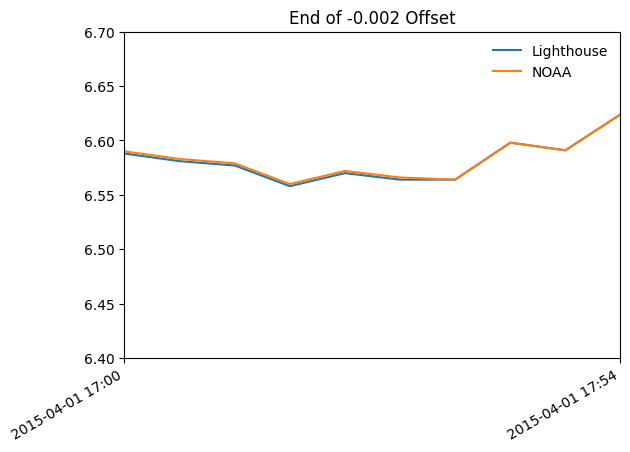

In [31]:
#plotting the end of -0.002 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.4,6.7)

start_date = pd.to_datetime('2015-04-01 17:00:00')

end_date = pd.to_datetime('2015-04-01 17:54:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('End of -0.002 Offset')

Ending point of the -0.002 offset

In [32]:
#adjusting the -0.002 offset
index_1 = date_index_locater('2015-02-20 17:36','2015-04-01 17:30:00')
comparison_df.loc[index_1, comparison_df.columns[4]] += 0.002

In [33]:
comparison_df[1677776:1677800]

,Dates,Lighthouse WL,NOAA WL,Shifted NOAA,Shifted LH
1677776,2015-02-20 17:36:00,6.573,6.533,6.574,6.574
1677777,2015-02-20 17:42:00,6.572,6.544,6.599,6.599
1677778,2015-02-20 17:48:00,6.597,6.555,6.589,6.589
1677779,2015-02-20 17:54:00,6.587,6.574,6.599,6.599
1677780,2015-02-20 18:00:00,6.597,6.599,6.593,6.593
1677781,2015-02-20 18:06:00,6.591,6.589,6.607,6.607
1677782,2015-02-20 18:12:00,6.605,6.599,6.624,6.624
1677783,2015-02-20 18:18:00,6.622,6.593,6.661,6.661
1677784,2015-02-20 18:24:00,6.659,6.607,6.646,6.646
1677785,2015-02-20 18:30:00,6.644,6.624,6.638,6.638


Validation of the change

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Corrected to NOAA')

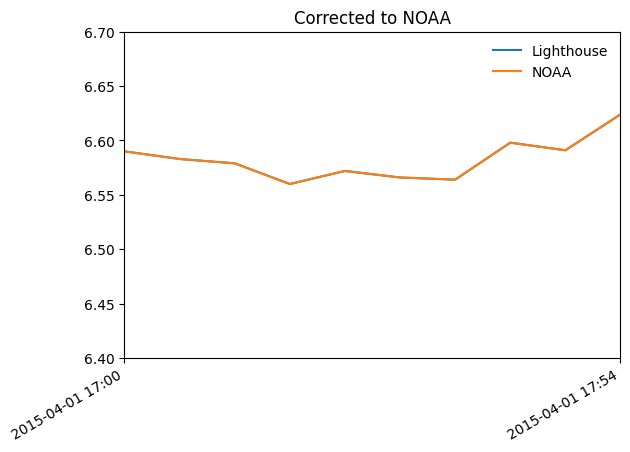

In [34]:
#plotting the adjusted offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.4,6.7)

start_date = pd.to_datetime('2015-04-01 17:00:00')

end_date = pd.to_datetime('2015-04-01 17:54:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Corrected to NOAA')

In [35]:
'''start_date = []
length_of_offset = []
count = 1  # Start with 1 to include the current row

for i in range(len(summary_df) - 1):
    if summary_df.iloc[i]['Difference'] == summary_df.iloc[i + 1]['Difference']:
        if count == 1: 
            start_date.append(summary_df.iloc[i]['Location Date'])
        count += 1
    else:
        start_date.append(summary_df.iloc[i]['Location Date'])
        length_of_offset.append(count)
        count = 1  # Reset count for the next sequence

# Handle the last sequence
start_date.append(summary_df.iloc[-1]['Location Date'])
length_of_offset.append(count)

concuringdf = pd.DataFrame()
concuringdf['Length of Offset'] = length_of_offset
concuringdf['Date'] = start_date
concuringdf'''

"start_date = []\nlength_of_offset = []\ncount = 1  # Start with 1 to include the current row\n\nfor i in range(len(summary_df) - 1):\n    if summary_df.iloc[i]['Difference'] == summary_df.iloc[i + 1]['Difference']:\n        if count == 1: \n            start_date.append(summary_df.iloc[i]['Location Date'])\n        count += 1\n    else:\n        start_date.append(summary_df.iloc[i]['Location Date'])\n        length_of_offset.append(count)\n        count = 1  # Reset count for the next sequence\n\n# Handle the last sequence\nstart_date.append(summary_df.iloc[-1]['Location Date'])\nlength_of_offset.append(count)\n\nconcuringdf = pd.DataFrame()\nconcuringdf['Length of Offset'] = length_of_offset\nconcuringdf['Date'] = start_date\nconcuringdf"

In [36]:
'''large_offsets = []

for i in range(len(concuringdf)):

    if concuringdf.iloc[i]['Length of Offset'] < 20:

        large_offsets.append(concuringdf.iloc[i]['Length of Offset'])

len(large_offsets)'''

"large_offsets = []\n\nfor i in range(len(concuringdf)):\n\n    if concuringdf.iloc[i]['Length of Offset'] < 20:\n\n        large_offsets.append(concuringdf.iloc[i]['Length of Offset'])\n\nlen(large_offsets)"

In [37]:
'''plt.hist(concuringdf['Length of Offset'])'''

"plt.hist(concuringdf['Length of Offset'])"

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Random gap fill from NOAA')

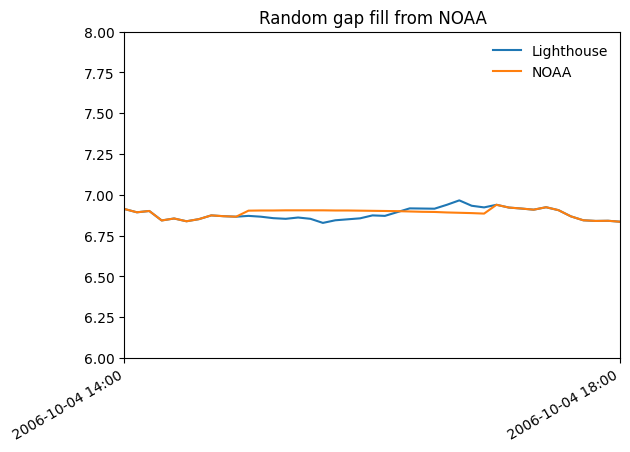

In [38]:
#straight lined filled points

plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6,8)

start_date = pd.to_datetime('2006-10-04 14:00')

end_date = pd.to_datetime('2006-10-04 18:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Random gap fill from NOAA')


Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'NOAA curved Interpolation')

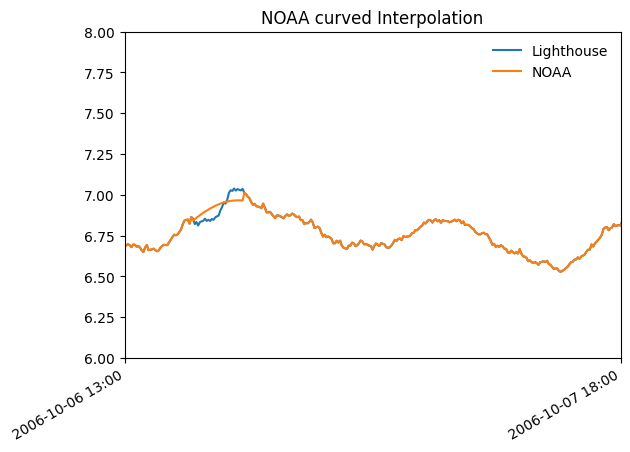

In [39]:
plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6,8)

start_date = pd.to_datetime('2006-10-06 13:00')

end_date = pd.to_datetime('2006-10-07 18:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('NOAA curved Interpolation')

In [40]:
#finds the differences in the dataset quicket then a loop
differences = comparison_df['Shifted LH'] - comparison_df['Shifted NOAA']
non_zero_differences = differences != 0

# Get the differences and the corresponding dates where the difference is non-zero
filtered_differences = differences[non_zero_differences]
filtered_dates = comparison_df['Dates'][non_zero_differences]

# Convert the results to DataFrames
differences_df = filtered_differences.to_frame(name='Difference')
dates_df = filtered_dates.to_frame(name='Date')

# Combine the two DataFrames
remaining_differences = differences_df.join(dates_df, how='inner')

cleaned_remaining_differences = remaining_differences.dropna()
cleaned_remaining_differences.reset_index(drop = True, inplace=True)

cleaned_remaining_differences

,Difference,Date
0,-0.095,1996-06-20 20:00:00
1,-0.107,1996-06-20 20:06:00
2,-0.078,1996-06-20 20:12:00
3,0.008,1996-06-20 20:18:00
4,0.102,1996-06-20 20:24:00
...,...,...
58417,0.074,2020-07-25 16:00:00
58418,0.099,2020-07-25 20:30:00
58419,-0.004,2020-07-30 02:12:00
58420,-0.016,2020-07-30 02:18:00


Coppy data to excel and inspect for concuring gaps

-0.005m offset from 2012-03-26 16:48 till 2012-03-26 20:24, then it switches to 0.002 till 2012-03-27 20:06, then switches back to -0.005m till 2012-04-24 12:48

0.001m offset from 2013-02-12 21:30 till 2013-03-22 13:30

0.003m offset from 2014-02-24 20:06 till 2014-21-2014 13:30

verry small -8.88e-16m offset from 2015-02-20 17:48 till 2015-04-01 16:30

0.002m offset from 2016-02-11 20:12 till 2016-03-04 17:00

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.011 Offset begins')

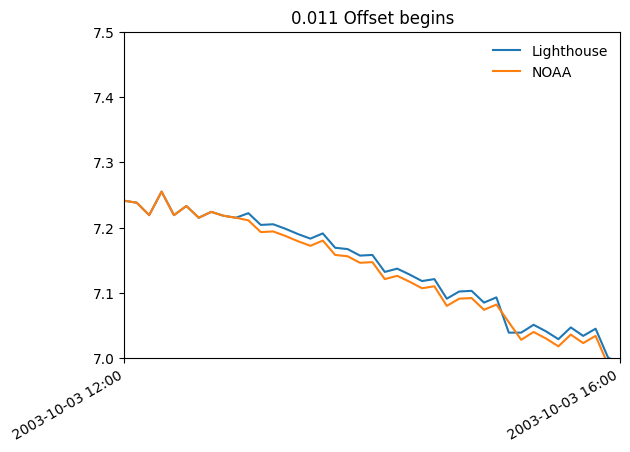

In [41]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(7,7.5)

start_date = pd.to_datetime('2003-10-03 12:00')

end_date = pd.to_datetime('2003-10-03 16:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.011 Offset begins')

Offset beings on October 03 2003

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.011 Offset Ends')

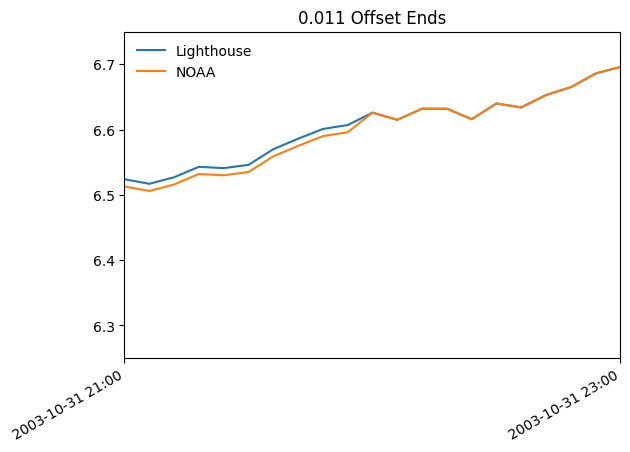

In [42]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.25,6.75)

start_date = pd.to_datetime('2003-10-31 21:00')

end_date = pd.to_datetime('2003-10-31 23:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.011 Offset Ends')

offset ends at october 31 2003 at 21:54

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.001 Offset begins')

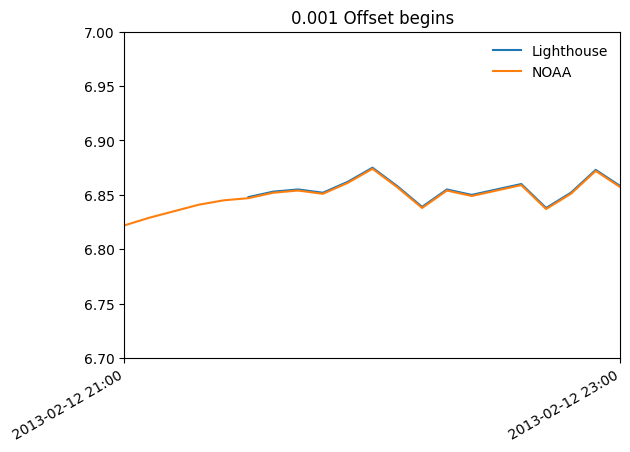

In [43]:
#0.001 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.7,7)

start_date = pd.to_datetime('2013-02-12 21:00')

end_date = pd.to_datetime('2013-02-12 23:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.001 Offset begins')

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.001 Offset ends')

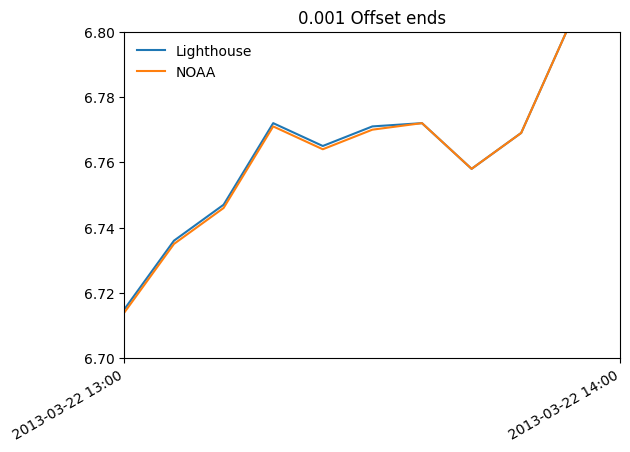

In [44]:
#0.001 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.7,6.8)

start_date = pd.to_datetime('2013-03-22 13:00')

end_date = pd.to_datetime('2013-03-22 14:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.001 Offset ends')

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.005 Offset Begins')

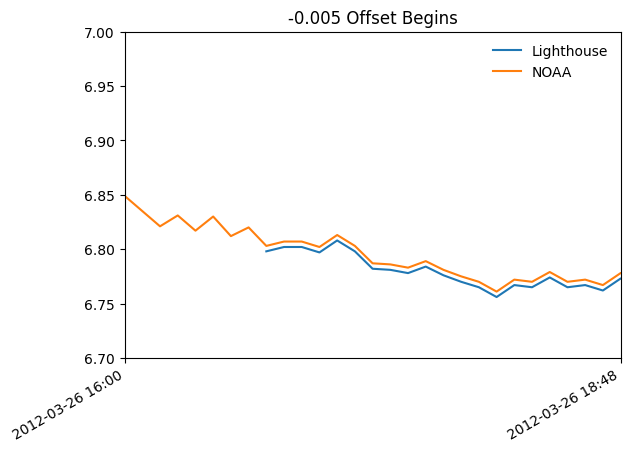

In [45]:
#-0.005 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.7,7)

start_date = pd.to_datetime('2012-03-26 16:00')

end_date = pd.to_datetime('2012-03-26 18:48')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.005 Offset Begins')

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.002 Offset Begins')

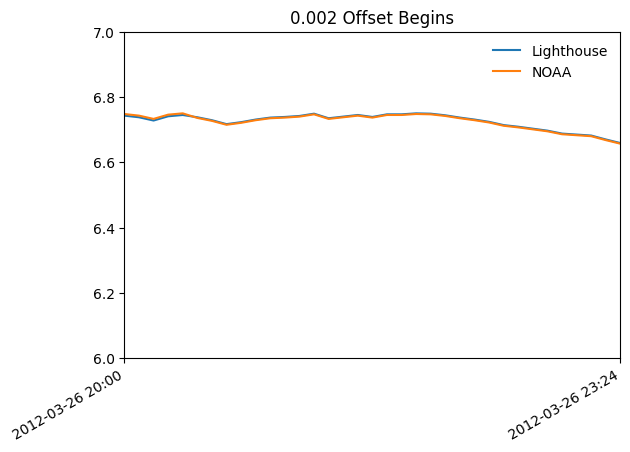

In [46]:
#0.002 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6,7)

start_date = pd.to_datetime('2012-03-26 20:00')

end_date = pd.to_datetime('2012-03-26 23:24')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.002 Offset Begins')

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.005 Offset Begins')

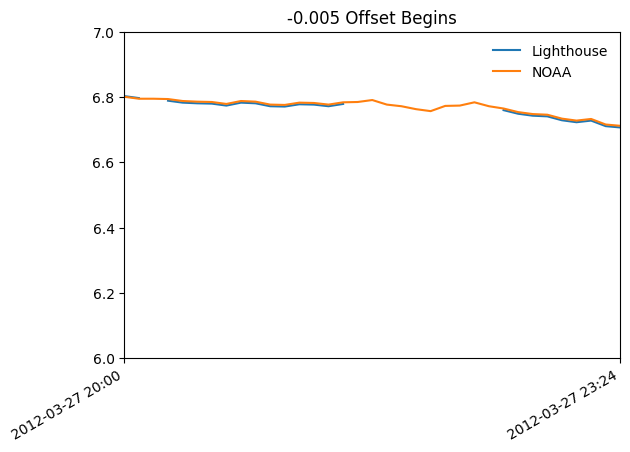

In [47]:
#-0.005 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6,7)

start_date = pd.to_datetime('2012-03-27 20:00')

end_date = pd.to_datetime('2012-03-27 23:24')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.005 Offset Begins')

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.005 Offset Ends')

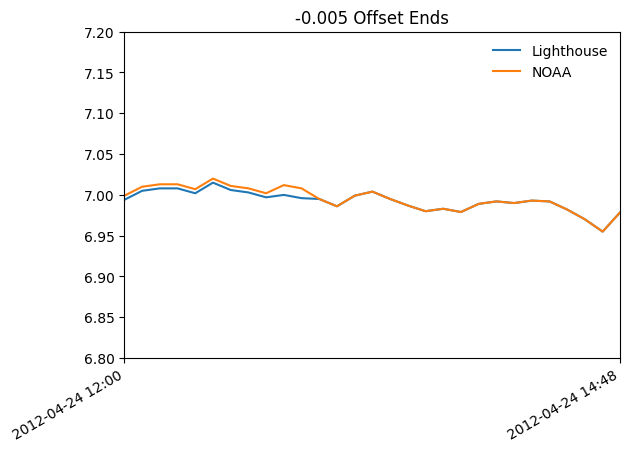

In [48]:
#0.005 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.8,7.2)

start_date = pd.to_datetime('2012-04-24 12:00')

end_date = pd.to_datetime('2012-04-24 14:48')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.005 Offset Ends')

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.001 Offset Begins')

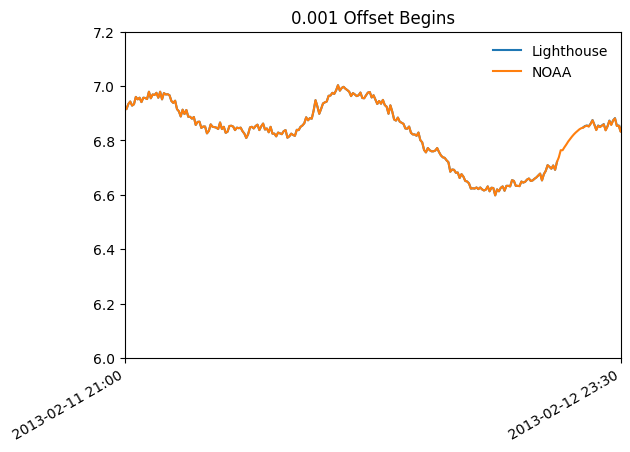

In [49]:
#0.001 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6,7.2)

start_date = pd.to_datetime('2013-02-11 21:00')

end_date = pd.to_datetime('2013-02-12 23:30')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.001 Offset Begins')

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.001 Offset Ends')

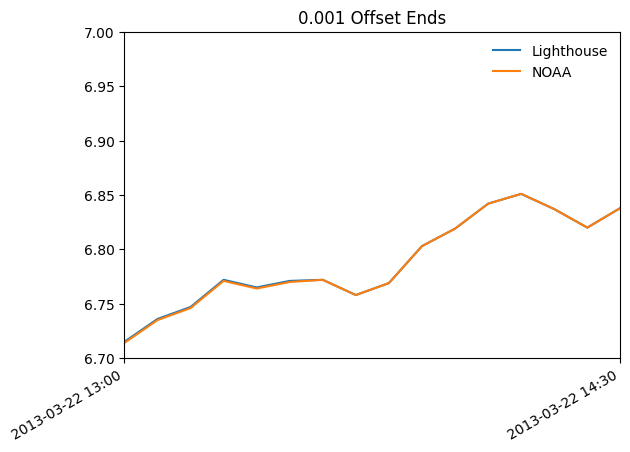

In [50]:
#0.001 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.7,7)

start_date = pd.to_datetime('2013-03-22 13:00')

end_date = pd.to_datetime('2013-03-22 14:30')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.001 Offset Ends')

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.003 Offset Begins')

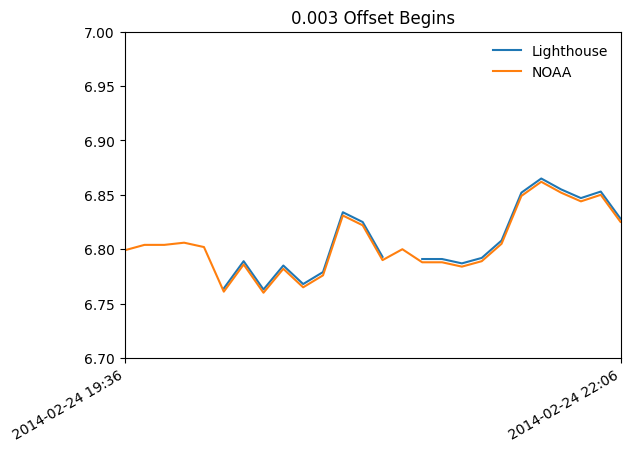

In [51]:
#0.003 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.7,7)

start_date = pd.to_datetime('2014-02-24 19:36')

end_date = pd.to_datetime('2014-02-24 22:06')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.003 Offset Begins')

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.003 Offset Ends')

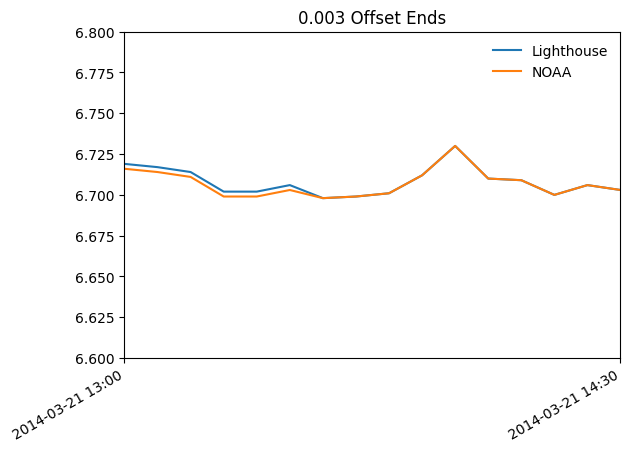

In [52]:
#0.003 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.6,6.8)

start_date = pd.to_datetime('2014-03-21 13:00')

end_date = pd.to_datetime('2014-03-21 14:30')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.003 Offset Ends')

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'small -8.88e-16m offset')

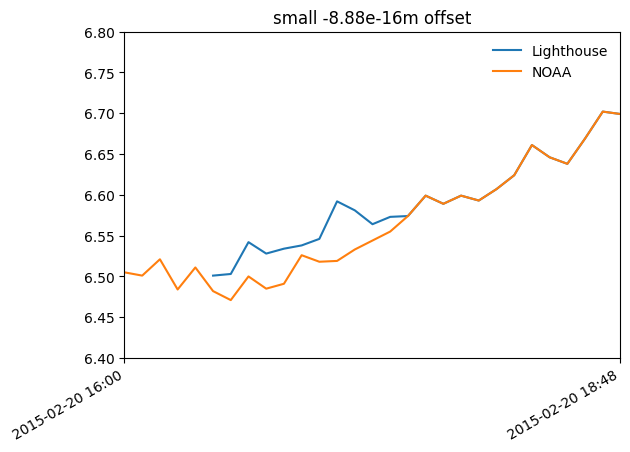

In [53]:
#-8.88e-16 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.4,6.8)

start_date = pd.to_datetime('2015-02-20 16:00')

end_date = pd.to_datetime('2015-02-20 18:48')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('small -8.88e-16m offset')

In [54]:
cleaned_remaining_differences[42000:42008]

,Difference,Date
42000,4.800000e-02,2015-02-20 17:18:00
42001,2.000000e-02,2015-02-20 17:24:00
42002,1.800000e-02,2015-02-20 17:30:00
42003,-8.881784e-16,2015-02-20 17:48:00
42004,-8.881784e-16,2015-02-20 19:18:00
42005,-8.881784e-16,2015-02-20 19:24:00
42006,-8.881784e-16,2015-02-20 19:48:00
42007,-8.881784e-16,2015-02-20 20:54:00


gap is too small to see

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.002m offset Begins')

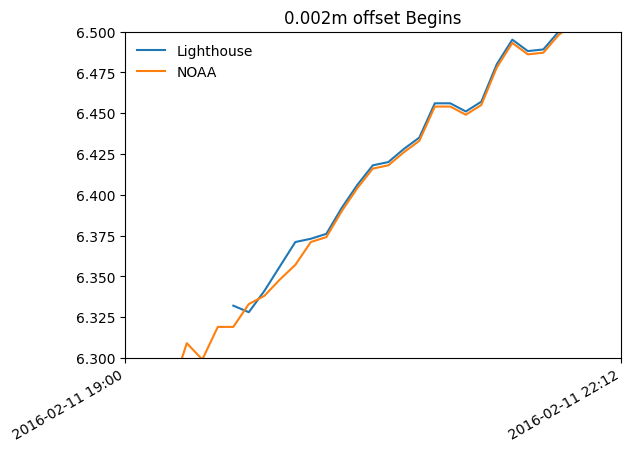

In [55]:
#0.002 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.3,6.5)

start_date = pd.to_datetime('2016-02-11 19:00')

end_date = pd.to_datetime('2016-02-11 22:12')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.002m offset Begins')

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.002m offset Ends')

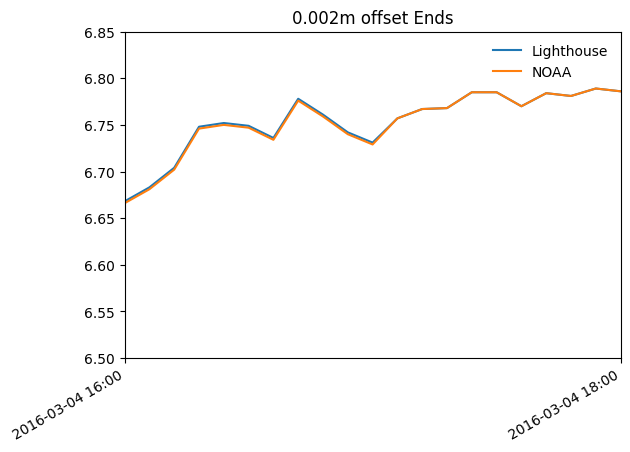

In [56]:
#0.002 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.5,6.85)

start_date = pd.to_datetime('2016-03-04 16:00')

end_date = pd.to_datetime('2016-03-04 18:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.002m offset Ends')

In [57]:
value_counts = cleaned_remaining_differences['Difference'].value_counts()

value_counts_df = value_counts.reset_index()

value_counts_df.columns = ['Value', 'Count']

repeating_values_df = value_counts_df[value_counts_df['Count'] > 20]

repeating_values_df

,Value,Count
0,-0.005,6243
1,0.011,6175
2,0.001,5888
3,0.003,5504
4,0.002,4384
...,...,...
189,-0.054,21
190,0.052,21
191,0.075,21
192,-0.019,21


In [58]:
date_index_locater('2012-01-12 15:00','2012-01-12 15:06')

[1405350, 1405351]

In [59]:
comparison_df[1405350:1405365]

,Dates,Lighthouse WL,NOAA WL,Shifted NOAA,Shifted LH
1405350,2012-01-12 15:00:00,6.099,6.097,6.117,6.117
1405351,2012-01-12 15:06:00,6.117,6.078,6.110,6.110
1405352,2012-01-12 15:12:00,6.110,6.099,6.131,6.131
1405353,2012-01-12 15:18:00,6.131,6.117,6.121,6.108
1405354,2012-01-12 15:24:00,6.108,6.110,6.108,6.150
1405355,2012-01-12 15:30:00,6.150,6.131,6.150,6.150
1405356,2012-01-12 15:36:00,6.150,6.121,6.156,6.156
1405357,2012-01-12 15:42:00,6.156,6.108,6.146,6.146
1405358,2012-01-12 15:48:00,6.146,6.150,6.123,6.123
1405359,2012-01-12 15:54:00,6.123,6.156,6.109,6.109


Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


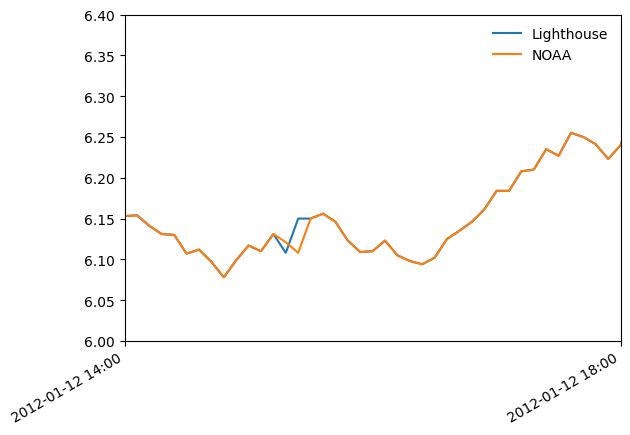

In [60]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6,6.4)

start_date = pd.to_datetime('2012-01-12 14:00')

end_date = pd.to_datetime('2012-01-12 18:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)

In [61]:
mask = comparison_df['Shifted LH'] == comparison_df['Shifted LH'].shift(-1)

# Use the mask to filter the DataFrame and get the double values and dates
double_values = comparison_df.loc[mask, 'Shifted LH'].to_frame()
double_dates = comparison_df.loc[mask, 'Dates'].to_frame()
double_dates


,Dates
36,1996-01-01 03:36:00
51,1996-01-01 05:06:00
203,1996-01-01 20:18:00
210,1996-01-01 21:00:00
216,1996-01-01 21:36:00
...,...
2170328,2020-10-04 00:48:00
2170360,2020-10-04 04:00:00
2170406,2020-10-04 08:36:00
2170427,2020-10-04 10:42:00


In [62]:
mask = comparison_df['Shifted NOAA'] == comparison_df['Shifted NOAA'].shift(-1)

# Use the mask to filter the DataFrame and get the double values and dates
double_values = comparison_df.loc[mask, 'Shifted NOAA'].to_frame()
double_dates = comparison_df.loc[mask, 'Dates'].to_frame()
double_dates

,Dates
36,1996-01-01 03:36:00
51,1996-01-01 05:06:00
203,1996-01-01 20:18:00
210,1996-01-01 21:00:00
216,1996-01-01 21:36:00
...,...
2303722,2022-04-12 20:12:00
2303727,2022-04-12 20:42:00
2303919,2022-04-13 15:54:00
2303970,2022-04-13 21:00:00


In [69]:

bhp_noaa_2012[' Water_Level'] = bhp_noaa_2012[' Water_Level'] +	6.495

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '2012')

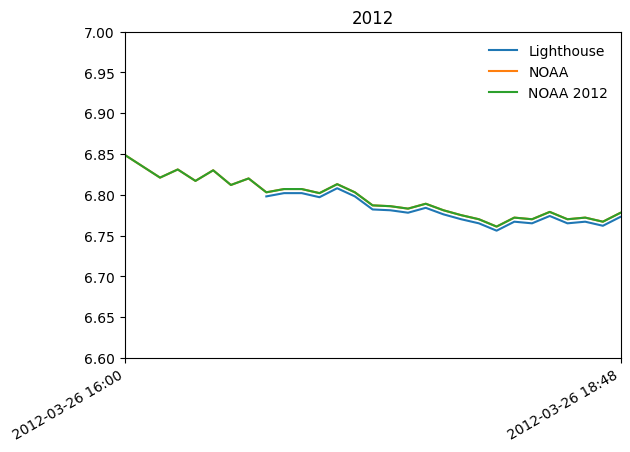

In [73]:
#0.003 offset
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.plot(bhp_noaa_2012['Date_Time'],bhp_noaa_2012[' Water_Level'],label = 'NOAA 2012')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.6,7)

start_date = pd.to_datetime('2012-03-26 16:00')

end_date = pd.to_datetime('2012-03-26 18:48')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('2012')

In [77]:
date_index_locater('2012-12-31 00:00','2012-12-31 23:54')

[1490160,
 1490161,
 1490162,
 1490163,
 1490164,
 1490165,
 1490166,
 1490167,
 1490168,
 1490169,
 1490170,
 1490171,
 1490172,
 1490173,
 1490174,
 1490175,
 1490176,
 1490177,
 1490178,
 1490179,
 1490180,
 1490181,
 1490182,
 1490183,
 1490184,
 1490185,
 1490186,
 1490187,
 1490188,
 1490189,
 1490190,
 1490191,
 1490192,
 1490193,
 1490194,
 1490195,
 1490196,
 1490197,
 1490198,
 1490199,
 1490200,
 1490201,
 1490202,
 1490203,
 1490204,
 1490205,
 1490206,
 1490207,
 1490208,
 1490209,
 1490210,
 1490211,
 1490212,
 1490213,
 1490214,
 1490215,
 1490216,
 1490217,
 1490218,
 1490219,
 1490220,
 1490221,
 1490222,
 1490223,
 1490224,
 1490225,
 1490226,
 1490227,
 1490228,
 1490229,
 1490230,
 1490231,
 1490232,
 1490233,
 1490234,
 1490235,
 1490236,
 1490237,
 1490238,
 1490239,
 1490240,
 1490241,
 1490242,
 1490243,
 1490244,
 1490245,
 1490246,
 1490247,
 1490248,
 1490249,
 1490250,
 1490251,
 1490252,
 1490253,
 1490254,
 1490255,
 1490256,
 1490257,
 1490258,
 1490259,


In [92]:
comparison_2012 = pd.DataFrame()

'''comparison_2012['Dates'] = bhp_noaa_2012['Date_Time']

comparison_2012['NOAA WL'][1402560:1490399] = comparison_df['Shifted NOAA']

comparison_2012['Lighthouse wl'][1402560:1490399] = comparison_df['Shifted LH']'''

comparison_2012 = comparison_df[1402560:1490399]

comparison_2012.reset_index(drop=True,inplace=True)

comparison_2012['Datum Shift wl'] = bhp_noaa_2012[' Water_Level']

comparison_2012['Datum Difference'] = comparison_2012['Datum Shift wl'] - comparison_2012['Shifted NOAA']
datum_shift = comparison_2012[comparison_2012['Datum Difference'] > 0.001]

datum_shift

C:\Users\mrpro\AppData\Local\Temp\ipykernel_10104\2653592226.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_2012['Datum Shift wl'] = bhp_noaa_2012[' Water_Level']
C:\Users\mrpro\AppData\Local\Temp\ipykernel_10104\2653592226.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_2012['Datum Difference'] = comparison_2012['Datum Shift wl'] - comparison_2012['Shifted NOAA']


,Dates,Lighthouse WL,NOAA WL,Shifted NOAA,Shifted LH,Datum Shift wl,Datum Difference


NO DIFFERENCE FROM DATUM SHIFTS